# Design and Analysis of Algorithms - Lab Assignment 1

## Submitted by: Isha Dagar
## Roll No. : 2301201090

In [6]:
import time
import random
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

### Profiling Functions

In [19]:
def measure_time(func, *args):
    start = time.perf_counter()
    func(*args)
    end = time.perf_counter()
    return (end - start) * 1e6

def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), max_iterations=1)
    return max(mem_usage) - min(mem_usage)

### 1. Fibonacci (Naive Recursive)

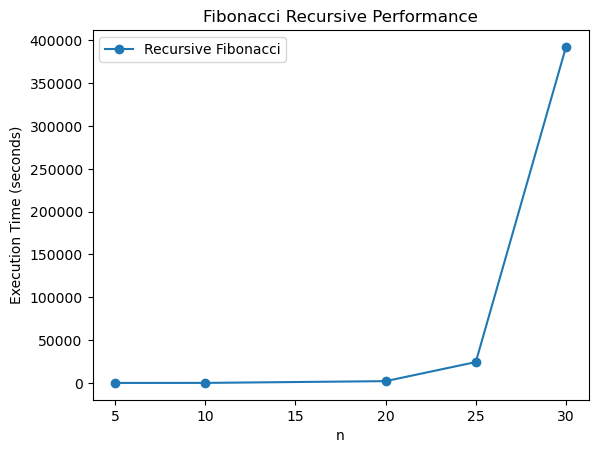

In [20]:
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# Profiling & Visualization
input_sizes = [5, 10, 20, 25, 30]
times = []
for n in input_sizes:
    t = measure_time(fibonacci_recursive, n)
    times.append(t)

plt.plot(input_sizes, times, marker="o", label="Recursive Fibonacci")
plt.xlabel("n")
plt.ylabel("Execution Time (seconds)")
plt.title("Fibonacci Recursive Performance")
plt.legend()
plt.show()

### 2. Fibonacci (Dynamic Programming)

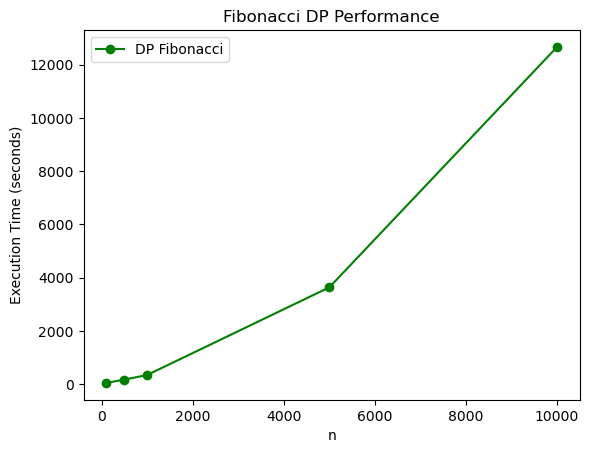

In [21]:
def fibonacci_dp(n):
    if n <= 1:
        return n
    fib = [0, 1]
    for i in range(2, n+1):
        fib.append(fib[i-1] + fib[i-2])
    return fib[n]

# Profiling & Visualization
input_sizes = [100, 500, 1000, 5000, 10000]
times = []
for n in input_sizes:
    t = measure_time(fibonacci_dp, n)
    times.append(t)

plt.plot(input_sizes, times, marker="o", label="DP Fibonacci", color="green")
plt.xlabel("n")
plt.ylabel("Execution Time (seconds)")
plt.title("Fibonacci DP Performance")
plt.legend()
plt.show()

### 3. Merge Sort

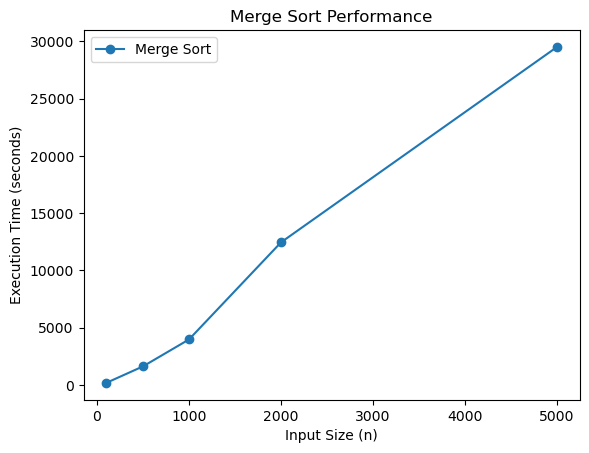

In [22]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

# Profiling & Visualization
sizes = [100, 500, 1000, 2000, 5000]
times = []
for n in sizes:
    arr = random.sample(range(1, n*10), n)
    t = measure_time(merge_sort, arr)
    times.append(t)

plt.plot(sizes, times, marker="o", label="Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Merge Sort Performance")
plt.legend()
plt.show()

### 4. Quick Sort

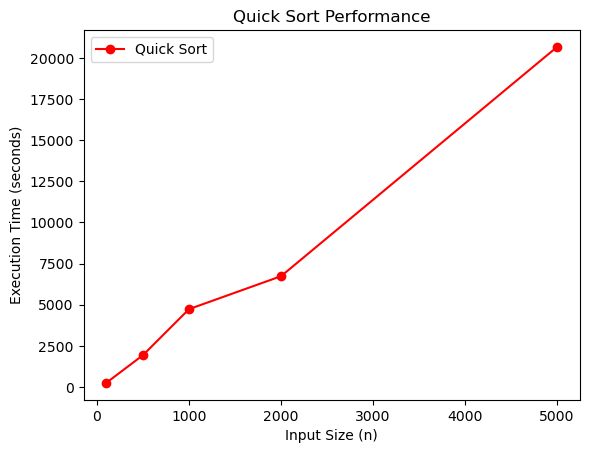

In [23]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Profiling & Visualization
sizes = [100, 500, 1000, 2000, 5000]
times = []
for n in sizes:
    arr = random.sample(range(1, n*10), n)
    t = measure_time(quick_sort, arr)
    times.append(t)

plt.plot(sizes, times, marker="o", label="Quick Sort", color="red")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Quick Sort Performance")
plt.legend()
plt.show()

### 5. Insertion Sort

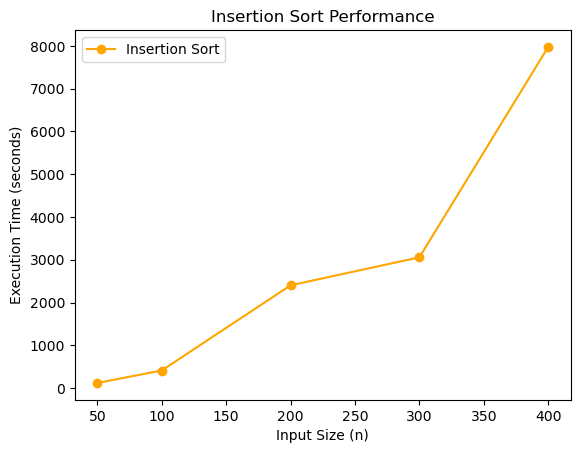

In [24]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

# Profiling & Visualization
sizes = [50, 100, 200, 300, 400]
times = []
for n in sizes:
    arr = random.sample(range(1, n*10), n)
    t = measure_time(insertion_sort, arr)
    times.append(t)

plt.plot(sizes, times, marker="o", label="Insertion Sort", color="orange")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Insertion Sort Performance")
plt.legend()
plt.show()

### 6. Bubble Sort

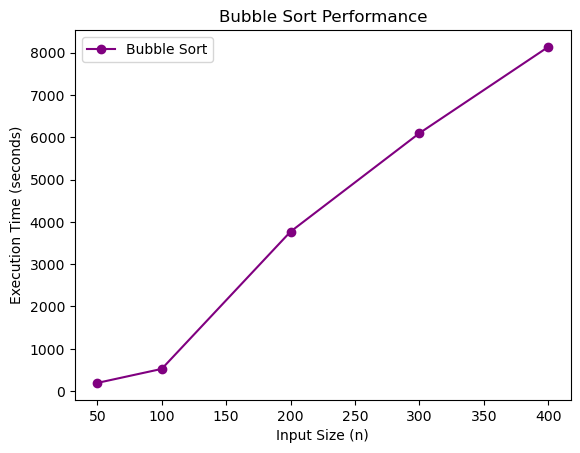

In [25]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Profiling & Visualization
sizes = [50, 100, 200, 300, 400]
times = []
for n in sizes:
    arr = random.sample(range(1, n*10), n)
    t = measure_time(bubble_sort, arr)
    times.append(t)

plt.plot(sizes, times, marker="o", label="Bubble Sort", color="purple")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Bubble Sort Performance")
plt.legend()
plt.show()

### 7. Selection Sort

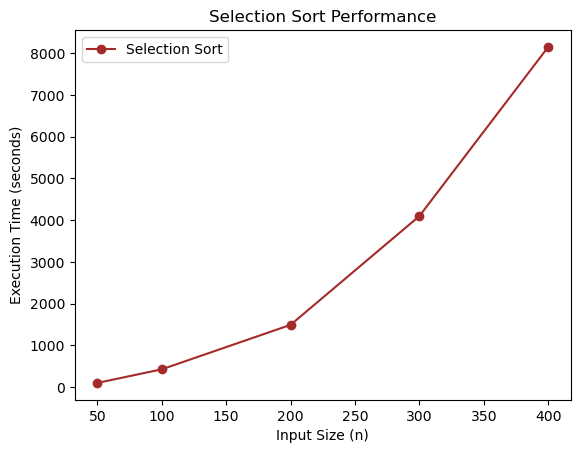

In [26]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Profiling & Visualization
sizes = [50, 100, 200, 300, 400]
times = []
for n in sizes:
    arr = random.sample(range(1, n*10), n)
    t = measure_time(selection_sort, arr)
    times.append(t)

plt.plot(sizes, times, marker="o", label="Selection Sort", color="brown")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Selection Sort Performance")
plt.legend()
plt.show()

### 8. Binary Search

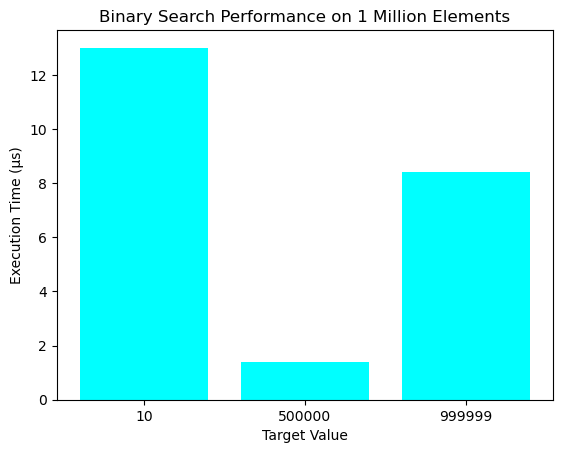

In [29]:
def binary_search(arr, target):
    left, right = 0, len(arr)-1
    while left <= right:
        mid = (left + right)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid+1
        else:
            right = mid-1
    return -1

# Profiling & Visualization
arr = list(range(1, 1000000))
targets = [10, 500000, 999999]
times = []
for t_val in targets:
    t = measure_time(binary_search, arr, t_val)
    times.append(t)

plt.bar([str(t) for t in targets], times, color="cyan")
plt.xlabel("Target Value")
plt.ylabel("Execution Time (µs)")
plt.title("Binary Search Performance on 1 Million Elements")
plt.show()